Data from Graham et al 2023 [Ecological network structure in response to community assembly processes over evolutionary time](https://doi.org/10.1111/mec.16873)

This is actually only partial data, I believe restricted to only zOTUs that blat hit as spiders (n=541).

The full data from this paper (n=5046 arthropod zOTUS) is in [zenodo](https://zenodo.org/records/7349067)

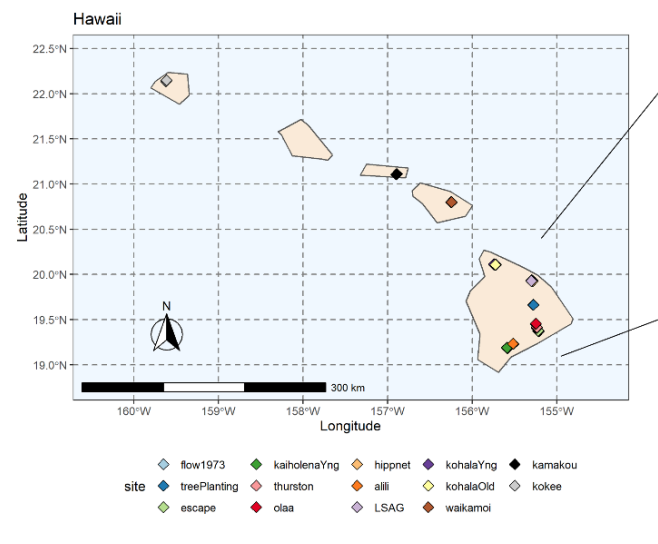

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from scipy.stats import entropy

import BCI

pd.set_option('display.max_columns', None)

#ipyclient = ipp.Client(cluster_id="iBioGen")
#len(ipyclient)

In [2]:
fastas = glob.glob("fastas/*fasta")

In [3]:
bcis = {}
for fasta in fastas:
    site = fasta.split("/")[1].split(".")[0]
    print(site)
    bcis[site] = BCI.BCI(data=fasta, verbose=True)
    bcis[site]._min_clust_threshold = 70
    bcis[site].run()

flow1973
[43, 31, 28, 23, 23, 22, 21, 20, 19, 17, 16, 15, 15, 13, 12, 7, 6, 6, 5, 5, 5, 5, 4, 4, 3, 3, 2, 2, 2, 2]
kaiholenaYng
[143, 90, 69, 66, 61, 55, 49, 45, 43, 39, 35, 34, 28, 24, 21, 16, 14, 14, 11, 10, 10, 9, 8, 8, 7, 7, 6, 6, 5, 5]
treePlanting
[105, 59, 45, 42, 38, 34, 33, 32, 31, 28, 26, 25, 23, 18, 14, 12, 9, 8, 6, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2]
alili
[116, 69, 57, 53, 47, 45, 41, 40, 37, 35, 33, 32, 28, 25, 19, 17, 12, 12, 9, 8, 8, 8, 7, 6, 6, 6, 4, 4, 3, 3]
kohalaOld
[103, 57, 44, 39, 36, 34, 30, 27, 27, 26, 25, 24, 21, 18, 12, 10, 9, 8, 8, 6, 6, 5, 5, 5, 5, 5, 3, 3, 3, 2]
waikamoi
[131, 85, 68, 62, 51, 45, 43, 40, 38, 34, 30, 28, 22, 19, 16, 14, 11, 8, 8, 7, 6, 5, 5, 5, 5, 5, 3, 3, 3, 3]
thurston
[125, 82, 69, 62, 58, 56, 49, 45, 38, 37, 34, 29, 25, 22, 18, 16, 14, 10, 9, 8, 7, 6, 6, 5, 5, 5, 4, 3, 2, 2]
kamakou
[123, 81, 64, 57, 53, 48, 44, 41, 36, 33, 30, 28, 24, 21, 17, 14, 11, 11, 7, 6, 5, 5, 5, 5, 5, 3, 2, 2, 2, 2]
escape
[88, 60, 52, 47, 44, 42, 36, 35, 33, 30, 3

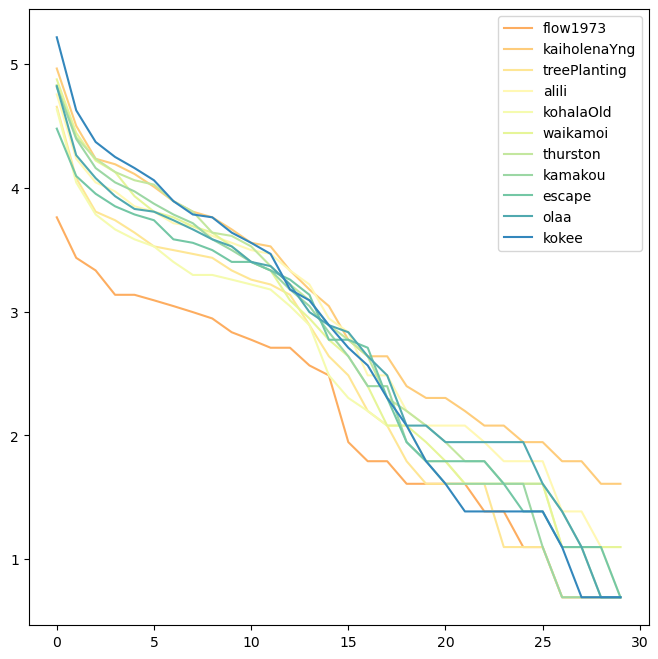

In [17]:
_ = BCI.plot_multi(bcis.values(), log=True, normalize=False)
#bcis["kokee"].samp

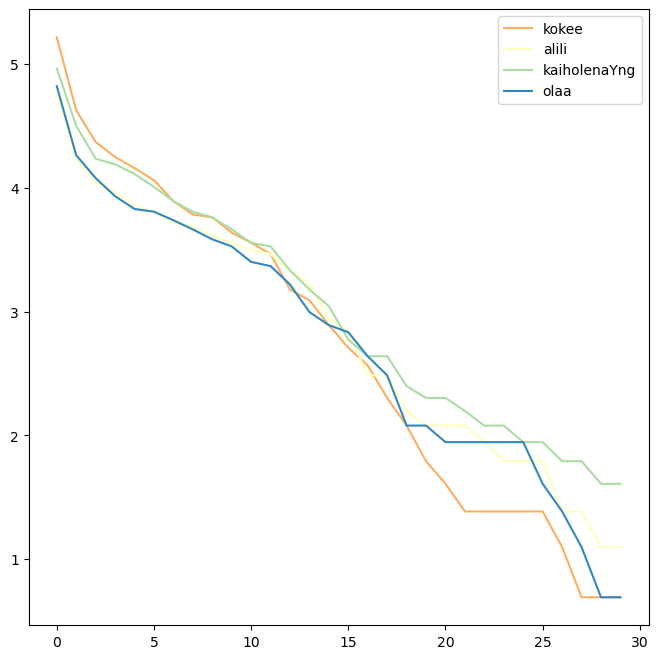

In [10]:
#_ = BCI.plot_multi(bcis.values(), log=True, normalize=False)
sites = ["kokee", "alili", "kaiholenaYng", 'olaa']
_ = BCI.plot_multi([bcis[x] for x in sites], log=True, normalize=False)

In [11]:
Kilauea = ["thurston", "escape", "treePlanting", "flow1973"]
MaunaLoa = ["alili", "olaa", "kaiholenaYng"]
older = ["kokee", "kamakou", "kohalaOld", "waikamoi"]
age_order = ["kokee", "kamakou", "kohalaOld", "waikamoi", "alili", "olaa", "thurston", "escape", "kaiholenaYng", "treePlanting", "flow1973"]

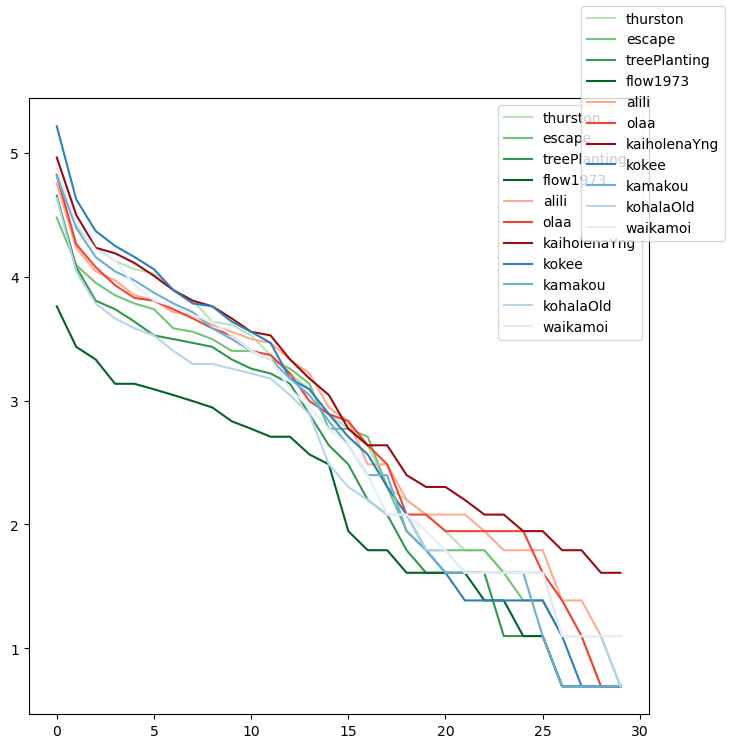

In [12]:
fig, ax = BCI.plot_multi([bcis[x] for x in Kilauea], log=True, normalize=False, cmap="Greens")
fig, ax = BCI.plot_multi([bcis[x] for x in MaunaLoa], log=True, normalize=False, ax=ax, cmap="Reds")
fig, ax = BCI.plot_multi([bcis[x] for x in older], log=True, normalize=False, ax=ax, cmap="Blues_r")
fig.legend()

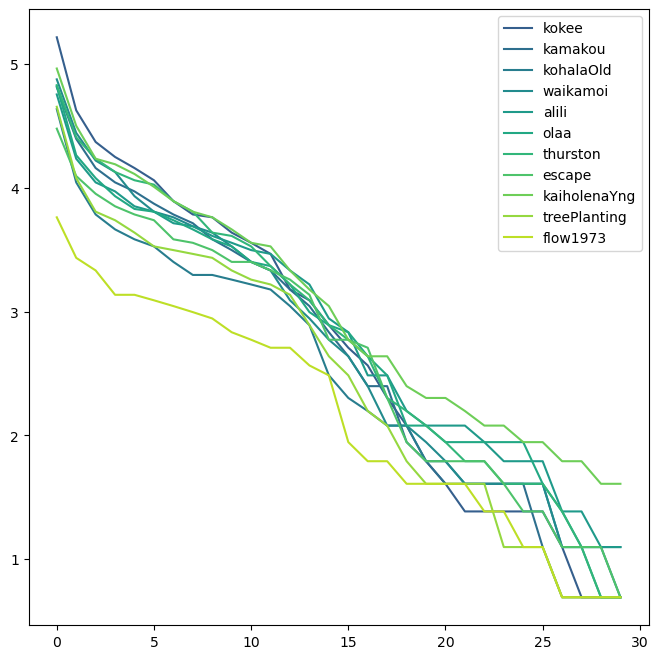

In [14]:
fig, ax = BCI.plot_multi([bcis[x] for x in age_order], log=True, normalize=False, cmap="viridis")

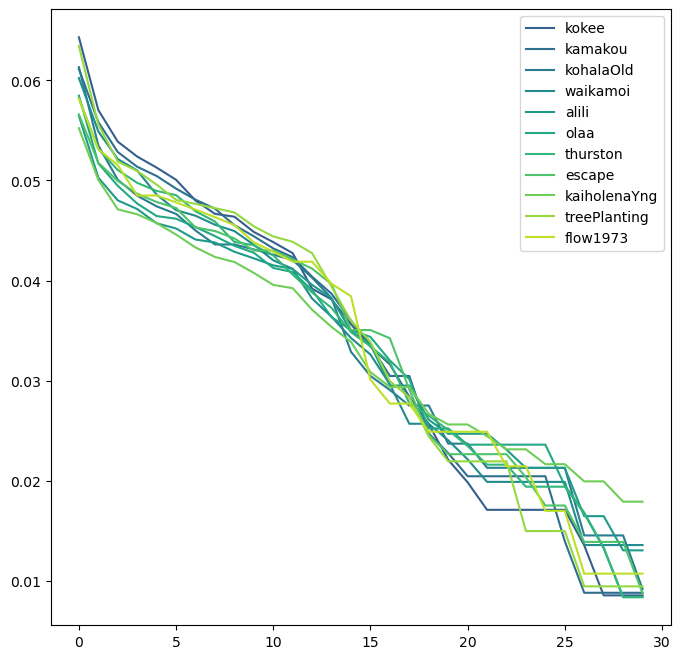

In [15]:
fig, ax = BCI.plot_multi([bcis[x] for x in age_order], log=True, normalize=True, cmap="viridis")

In [33]:
for bci in bcis.values():
    print(bci.samp, "\n", np.exp(entropy(bci.bci)))

kokee 
 14.477656618548128
treePlanting 
 15.713492113334327
flow1973 
 17.243075907814017
kohalaOld 
 15.692177401212628
kaiholenaYng 
 15.90500022817141
olaa 
 16.029657786793752
waikamoi 
 15.219127216681642
thurston 
 15.854491840446814
alili 
 16.402791653892393
kamakou 
 15.56005717549048
escape 
 16.77094222802544


In [ ]:
## Comparing LTT plots
## Establish baseline for different landcover types